<a href="https://colab.research.google.com/github/ranjan2829/Quant/blob/main/NIFTY50_HeatMap_for_Returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed


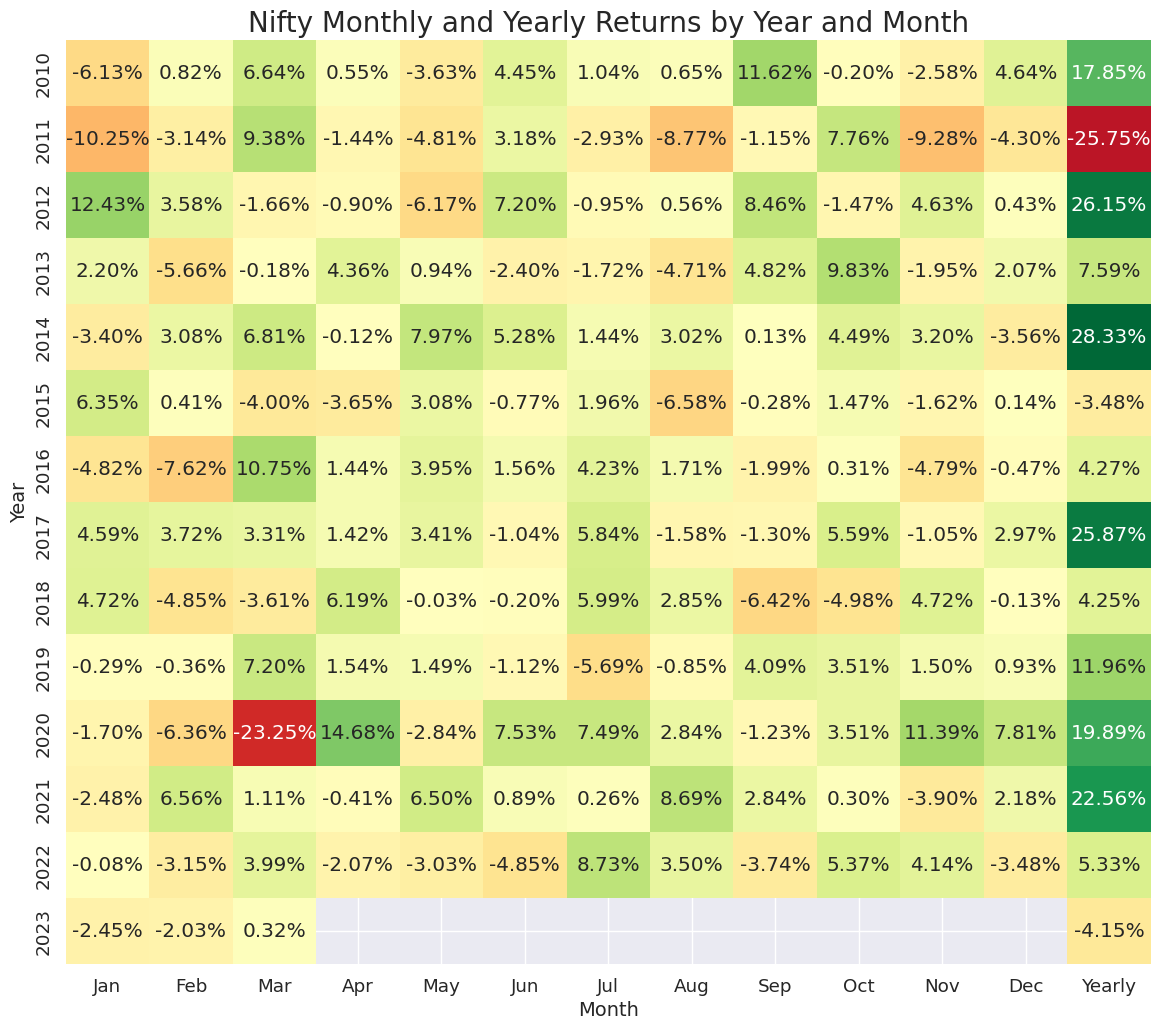

In [1]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ticker = "^NSEI"
start_date = "2009-12-31"
end_date = "2023-04-01"

# Download the historical data for Nifty Index
data = yf.download(ticker, start=start_date, end=end_date)

# Resample the data on a monthly basis
data_monthly = data.resample('M').last()

# Calculate the monthly returns
monthly_returns = data_monthly['Adj Close'].pct_change()

# Convert monthly returns to a pandas DataFrame
monthly_returns_df = pd.DataFrame(monthly_returns)

# Pivot the DataFrame to create a matrix of monthly returns by year and month
monthly_returns_matrix = monthly_returns_df.pivot_table(values='Adj Close', index=monthly_returns_df.index.year, columns=monthly_returns_df.index.month)

# Set the column names to the month names
monthly_returns_matrix.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Calculate the sum of monthly returns for each year
yearly_returns = monthly_returns_df.groupby(monthly_returns_df.index.year)['Adj Close'].sum()

# Add the yearly returns to the matrix as a new column
monthly_returns_matrix['Yearly'] = yearly_returns

# Set the font scale
sns.set(font_scale=1.2)

# Plot the heatmap using seaborn
plt.figure(figsize=(14, 12))
sns.heatmap(monthly_returns_matrix, annot=True, cmap='RdYlGn', center=0, fmt='.2%', cbar=False)
plt.title('Nifty Monthly and Yearly Returns by Year and Month', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.show()
